# Explore here

In [235]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [236]:
#Vizualisamos dataset y nos guardamos solo Latitude, Longitude y MedInc: 
df = pd.read_csv('/workspaces/pauline-K-Medias/data/raw/housing.csv')
df = df[['Latitude', 'Longitude', 'MedInc']]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [237]:
#Dividimos entre train/test:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


Construye un K-Means: primer vamos a determinar el k optimo, que queremos usar para el modelo :


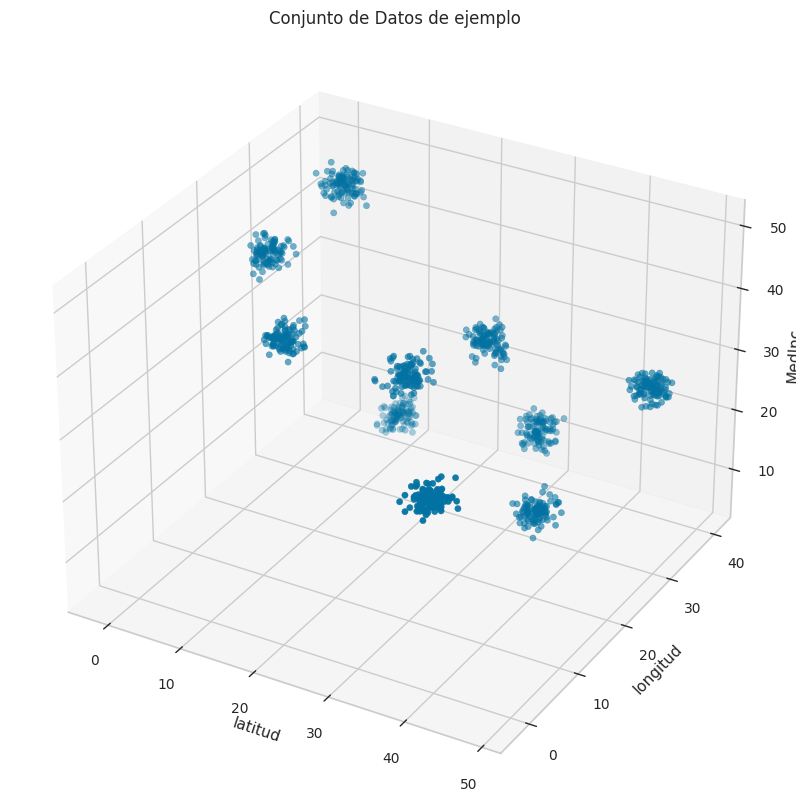

In [238]:
#Generar un conjunto de datos de ejemplo con los datos de entrenamiento
X_train, _ = make_blobs(center_box=(0, 50), n_samples=1000, centers=10, cluster_std=1.2, random_state=10, n_features=3)

#Graficar el conjunto de datos generado, en 3D como hay 3 caracteristicas :
fig = plt.figure(figsize=(12, 10)) 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2])

# Etiquetas
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')
ax.set_zlabel('MedInc')

plt.title('Conjunto de Datos de ejemplo')
plt.show()

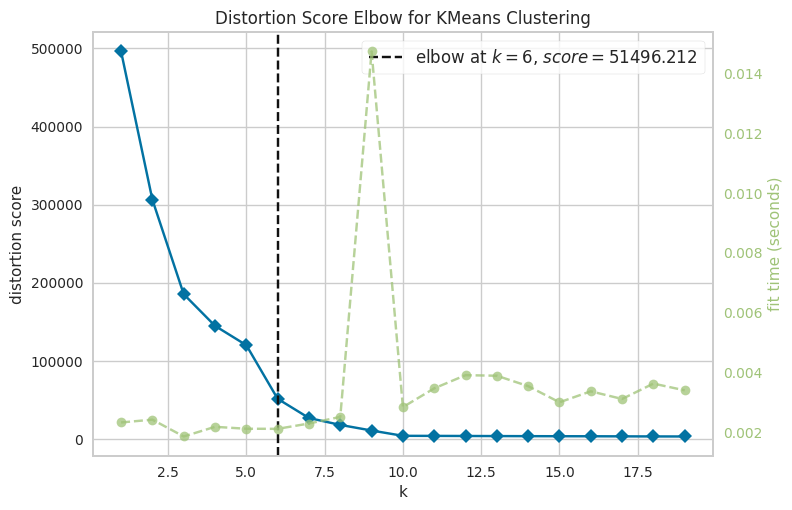

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [239]:
#Clase KElbowVisualizer para visualizar el codo (el num de cluster optimal (k))
elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(X_train)
elbow_vis.show()


Ese gráfico enseña : 
- Inercia  de los errores cuadráticos (variabilidad dentro de cada cluster; es decir, qué tan agrupados están los puntos dentro de cada grupo) en el eje Y 
- vs número de clusters (k) en el eje X

Al inicio : con un valor bajo de k, es decir, pocos clusters, la inercia es alta, ya que el modelo tiene que agrupar muchos puntos en pocos clusters, lo que da lugar a clusters más grandes y menos homogéneos

- Codo = k optimo = **el numero de clusters optimo** = el punto donde la inercia disminuye más lentamente, aquí es 6.

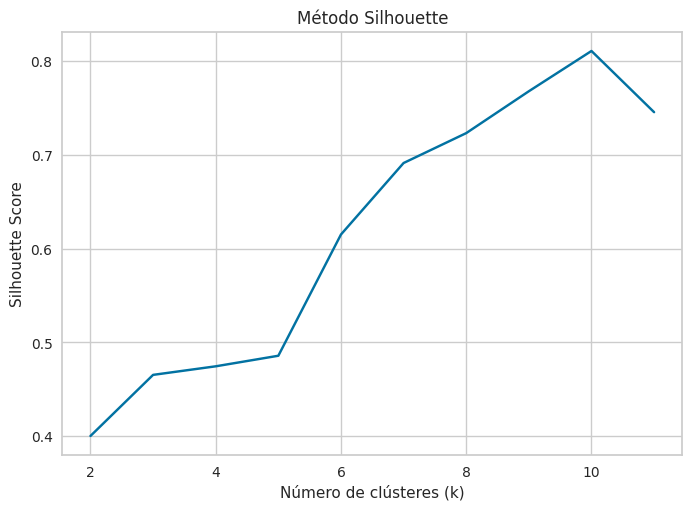

In [240]:
#Definir el rango de número de clústeres para probar (intentamos con 12, el doble del k que nos salió antes)
k_values = range(2, 12)

#Inicializar listas para almacenar los valores de silhouette para cada número de clústeres
silhouette_scores = []

#Probar diferentes valores de k
for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
  silhouette_scores.append(silhouette_score(X_train, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.show()

Pico alto a k=10, con más de 0,8 (Solhouette score ente -1 y 1)

Son 4 clusters más que el k optimal que obtuvimos en el test anterior, pero también graficamente era donde la linea empezaba a ser plana.

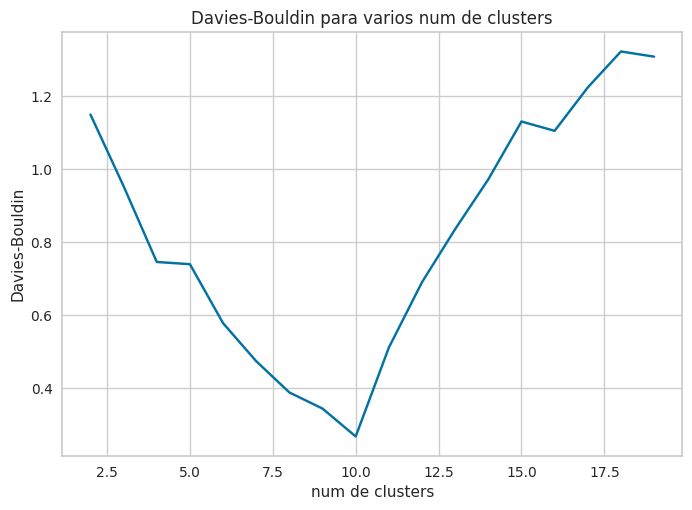

In [241]:
#Sacamos el índice Davies-Bouldin para evaluar la calidad de los clusters
num_clusters = range(2, 20)
db_scores = []

#Probar diferentes valores de k
for k in num_clusters:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
    db_scores.append(davies_bouldin_score(X_train, cluster_labels))

plt.plot(num_clusters, db_scores)
plt.title('Davies-Bouldin para varios num de clusters')
plt.xlabel('num de clusters')
plt.ylabel('Davies-Bouldin')
plt.show()

Igual que con el metodo silhouette, nos sale que la mejor separación entre los clusters es cuando son **10**. 

Construcción del modelo:

In [242]:
#Entrenar el modelo entonces con 10 clusters, 
model = KMeans(n_clusters = 10, random_state = 42)

#Lo aplicamos a train:
model.fit(X_train)
model.predict(X_train)



array([1, 9, 6, 1, 0, 6, 5, 0, 4, 2, 2, 6, 2, 6, 5, 7, 7, 7, 6, 5, 5, 0,
       3, 3, 3, 3, 7, 7, 7, 0, 9, 7, 2, 1, 2, 0, 5, 5, 5, 8, 3, 3, 3, 5,
       7, 3, 2, 8, 9, 7, 5, 3, 0, 7, 3, 9, 1, 6, 5, 4, 1, 5, 5, 8, 3, 7,
       7, 2, 1, 2, 8, 6, 7, 4, 8, 4, 0, 3, 0, 9, 2, 4, 2, 6, 6, 6, 0, 6,
       4, 5, 9, 1, 8, 4, 3, 8, 8, 9, 9, 8, 5, 7, 0, 6, 0, 1, 8, 8, 7, 2,
       9, 2, 5, 6, 8, 3, 6, 3, 8, 6, 5, 7, 7, 0, 3, 7, 9, 9, 4, 7, 9, 2,
       7, 2, 4, 1, 8, 6, 2, 3, 5, 2, 4, 9, 9, 3, 2, 7, 2, 7, 8, 5, 3, 3,
       0, 0, 4, 5, 7, 9, 0, 8, 0, 6, 5, 1, 8, 4, 1, 0, 9, 6, 9, 0, 5, 3,
       2, 8, 9, 1, 0, 7, 1, 6, 8, 7, 7, 4, 2, 4, 4, 3, 5, 4, 8, 6, 2, 0,
       3, 3, 3, 7, 9, 3, 8, 9, 5, 5, 7, 3, 1, 8, 8, 4, 4, 0, 3, 9, 7, 4,
       8, 6, 0, 3, 6, 4, 9, 1, 7, 5, 1, 1, 1, 4, 0, 1, 6, 5, 4, 2, 2, 6,
       7, 1, 3, 6, 2, 0, 8, 9, 9, 7, 9, 8, 6, 9, 0, 0, 3, 3, 5, 8, 4, 6,
       4, 8, 9, 5, 8, 1, 5, 2, 0, 8, 5, 5, 1, 3, 0, 0, 0, 2, 2, 6, 7, 1,
       1, 7, 4, 2, 7, 7, 9, 2, 4, 3, 0, 1, 9, 5, 0,

In [243]:
#Obtener las etiquetas de los clusters
y_train = model.labels_ #contiene las etiquetas de los clusters a los que se ha asignado cada punto de datos en el conjunto train

#Convertir X_train a df(xque es numpy.array):
X_train = pd.DataFrame(X_train)
#Añadir la columna 'cluster' como una columna categórica
X_train["cluster"] = pd.Categorical(y_train)

print(X_train.head())


           0          1          2 cluster
0  31.848622  34.087939  13.833045       1
1  27.333812  32.112055  31.008553       9
2  10.163817  36.196494   9.005012       6
3  30.384530  37.055894  16.655038       1
4  23.938630  21.039786  31.072767       0


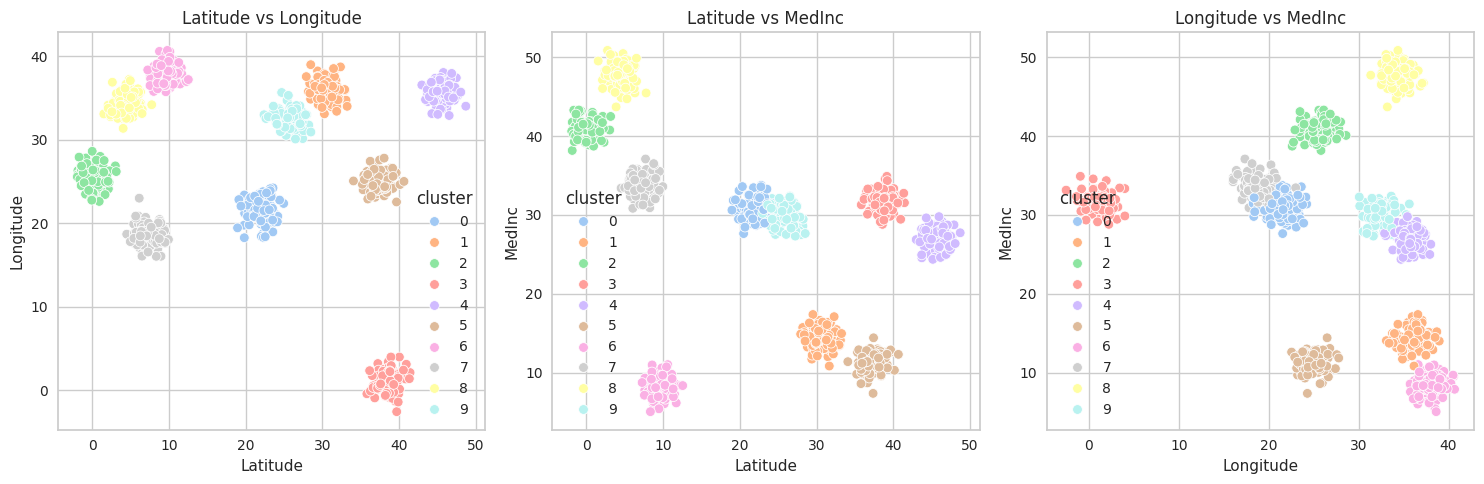

In [244]:
#Ploteamos

#Renombrar las columnas porque se han convertidas en 0,1,2
X_train.columns = ['Latitude', 'Longitude', 'MedInc', 'cluster']

# Crear los subgráficos (1 fila, 3 columnas)
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

#Latitude vs Longitude
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="pastel") # hue asigna diferentes colores a los puntos según los valores de la columna que le pases
axis[0].set_title("Latitude vs Longitude")

#Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="pastel")
axis[1].set_title("Latitude vs MedInc")

#Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="pastel")
axis[2].set_title("Longitude vs MedInc")

plt.tight_layout()
plt.show()


In [245]:
#Hacemos todo igual con datos de test : 
model.fit(X_test)
model.predict(X_test)

#Obtener las etiquetas de los clusters
y_test = model.labels_ #contiene las etiquetas de los clusters a los que se ha asignado cada punto de datos en el conjunto train

#Convertir X_train a df(xque es numpy.array):
X_test = pd.DataFrame(X_test)
#Añadir la columna 'cluster' como una columna categórica
X_test["cluster"] = pd.Categorical(y_test)

print(X_test.head())


       Latitude  Longitude  MedInc cluster
20046     36.06    -119.01  1.6812       5
3024      35.14    -119.46  2.5313       5
15663     37.80    -122.44  3.4801       3
20484     34.28    -118.72  5.7376       2
9814      36.62    -121.93  3.7250       1


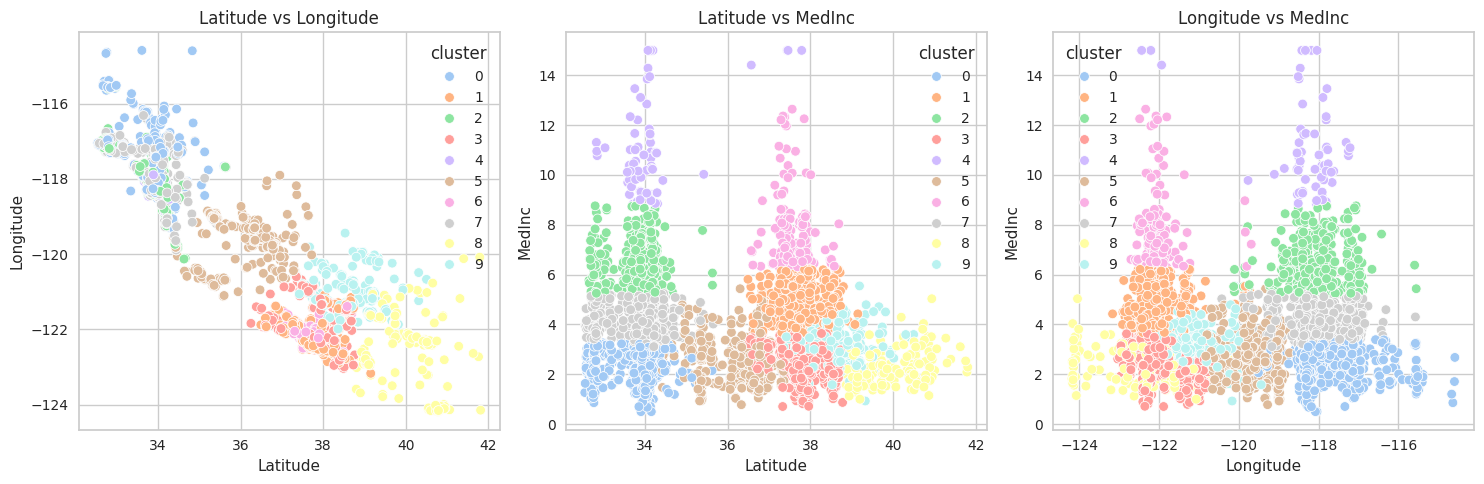

In [246]:
#Ploteamos

#Renombrar las columnas porque se han convertidas en 0,1,2
X_test.columns = ['Latitude', 'Longitude', 'MedInc', 'cluster']

# Crear los subgráficos (1 fila, 3 columnas)
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

#Latitude vs Longitude
sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", palette="pastel") # hue asigna diferentes colores a los puntos según los valores de la columna que le pases
axis[0].set_title("Latitude vs Longitude")

#Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", palette="pastel")
axis[1].set_title("Latitude vs MedInc")

#Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", palette="pastel")
axis[2].set_title("Longitude vs MedInc")

plt.tight_layout()
plt.show()


No hay ningun vinculo entre los graf de train y test ... no logro entender porque, si tengo que cambiar algo? o sino como interpretarlo?

Vamos ahora a estudiar los resultados con el modelo de Random forest porque es un modelo de clasificación que divide los datos en función de las características, en varios árboles de decisión (que son el promedio de las predicciones de muchos árboles). Normalmente da mejores resultados que un solo árbol y lucha más contra sobreajuste.


In [247]:
#RandomForest : 

#Primero buscamos el num de arboles de decision (n_estimadors) optimo, para optimizar ese hiperparametro:

#Diccionario con el rango de n_estimators a probar
param_grid = {'n_estimators': [10, 50, 100, 200, 500]}

#Usamos GridSearchCV :
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Ver el mejor número de estimadores
print(f"Mejor n_estimatos: {grid_search.best_params_['n_estimators']}")


Mejor n_estimatos: 10


In [248]:
#Entrenamos el modelo con el numero que sale: 
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

#Predicción
y_pred_rf = model.predict(X_test)

#Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con 100 árboles: {accuracy}")

Precisión del modelo con 100 árboles: 0.39147286821705424
